<a href="https://colab.research.google.com/github/CS129-18-A-2019-2020/Applied-Deep-Learning-Resources/blob/master/Perceptron_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pylab inline
import pandas as pd
import seaborn as sb
from tensorflow import keras
from sklearn import model_selection, metrics, impute, preprocessing, linear_model

# Set random seed
from numpy.random import seed
seed(42)
from tensorflow import set_random_seed
set_random_seed(42)

Populating the interactive namespace from numpy and matplotlib


### Import the Pima Indians Dataset

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/CS129-18-A-2019-2020/Applied-Deep-Learning-Resources/master/pima-indians-diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,HasDiabetes
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,HasDiabetes
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


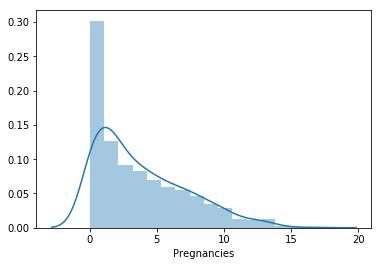

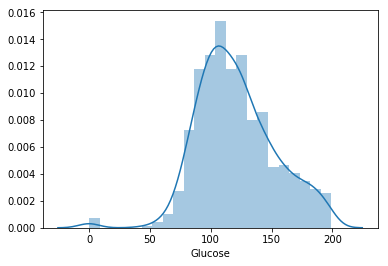

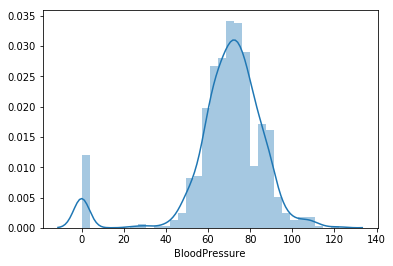

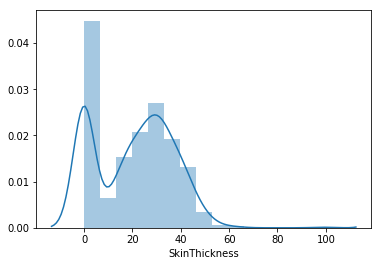

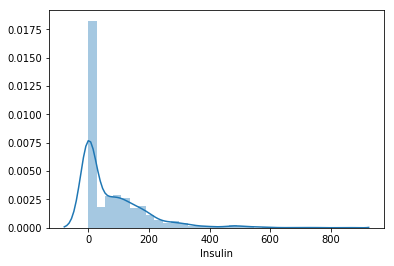

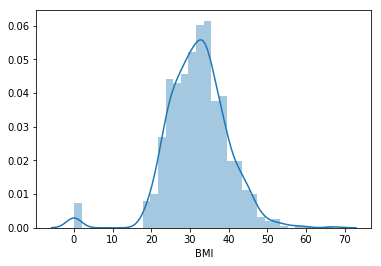

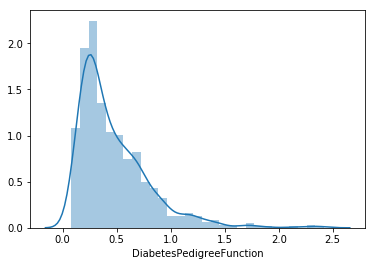

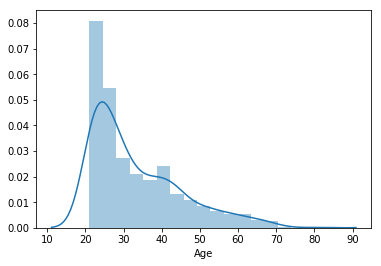

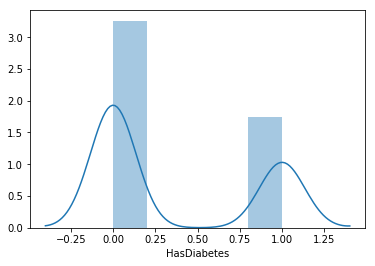

In [5]:
for col in df.columns:
  show(sb.distplot(df[col]))

### Data Preprocessing and Train-Test-Split

Perceptrons and generally neural networks have a difficult time with non-processed values. 

Generally, you'd want to scale values from 0 to 1, just because these kinds of models don't work well with multiple ranges of values of the input features.

__Note__: MinMax scaling is __outlier__ sensitive, meaning that if you do not clean or "clip" your outliers, the MinMax scaler would be distorted.

#### Split our data first to train and test splits prior to data cleaning.



In [0]:
df_train, df_test = model_selection.train_test_split(df, test_size=0.3, stratify=df['HasDiabetes'], random_state=42)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
X_columns = df_train.drop('HasDiabetes', axis=1).columns
y_column = 'HasDiabetes'

#### Scaling and Cleaning our (training) data.

In [0]:
# Replace "faulty" zero values for Glucose, BloodPressure, SkinThickness, Insulin, and BMI with their respective means.

cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
imputers = {}

for col in cols_to_replace:
  df_train[col] = df_train[col].replace(0, np.nan)
  imputers[col] = impute.SimpleImputer()
  df_train[col] = imputers[col].fit_transform(df_train[col].values.reshape(-1, 1))
  df_test[col] = imputers[col].transform(df_test[col].values.reshape(-1, 1))

In [8]:
# Checking the imputers
imputers

{'BMI': SimpleImputer(add_indicator=False, copy=True, fill_value=None,
               missing_values=nan, strategy='mean', verbose=0),
 'BloodPressure': SimpleImputer(add_indicator=False, copy=True, fill_value=None,
               missing_values=nan, strategy='mean', verbose=0),
 'Glucose': SimpleImputer(add_indicator=False, copy=True, fill_value=None,
               missing_values=nan, strategy='mean', verbose=0),
 'Insulin': SimpleImputer(add_indicator=False, copy=True, fill_value=None,
               missing_values=nan, strategy='mean', verbose=0),
 'SkinThickness': SimpleImputer(add_indicator=False, copy=True, fill_value=None,
               missing_values=nan, strategy='mean', verbose=0)}

In [0]:
# Normalizing the training data

minmax_scalers = {}
for col in X_columns:
  minmax_scalers[col] = preprocessing.MinMaxScaler()
  df_train[col] = minmax_scalers[col].fit_transform(df_train[col].values.reshape(-1, 1))
  df_test[col] = minmax_scalers[col].transform(df_test[col].values.reshape(-1, 1))

In [10]:
minmax_scalers

{'Age': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'BMI': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'BloodPressure': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'DiabetesPedigreeFunction': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'Glucose': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'Insulin': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'Pregnancies': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'SkinThickness': MinMaxScaler(copy=True, feature_range=(0, 1))}

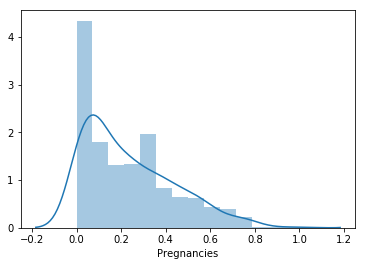

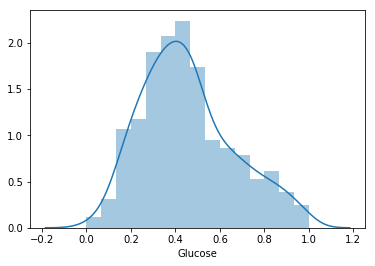

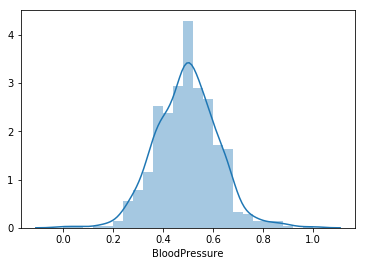

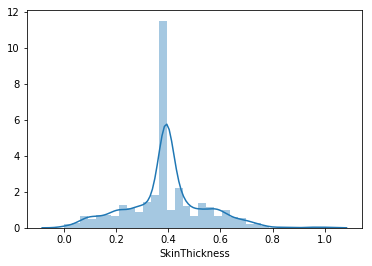

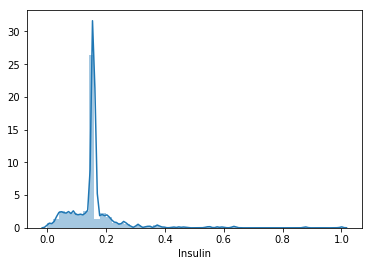

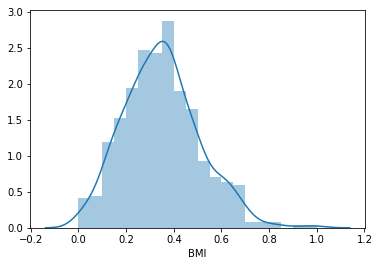

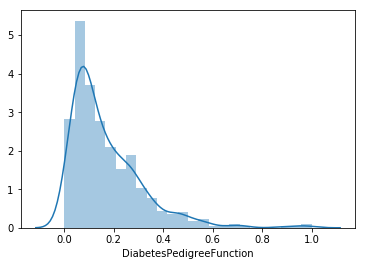

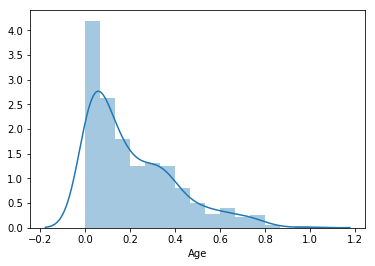

In [11]:
for col in X_columns:
  show(sb.distplot(df_train[col]))

### Modeling with the Perceptron

In [12]:
# We set the input node to have the exact number of our features
inputs = keras.Input(
    shape=(
        len(X_columns),
        )
    )

# Define the perceptron, that only has 1 unit and has the sigmoid as the activation function
perceptron = keras.layers.Dense(1, activation='sigmoid')

# Define the output
outputs = perceptron(inputs)

# Define the final model
model = keras.Model(inputs=inputs, outputs=outputs, name='perceptron_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


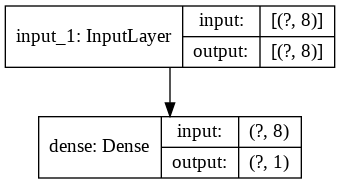

In [13]:
keras.utils.plot_model(model, 'my_first_perceptron.png', show_shapes=True)

In [14]:
# Define model hyperparameters for training the perceptron
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(),
              metrics=['binary_accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
# Use EarlyStopping to prevent possible overfitting
history = model.fit(df_train[X_columns].values, df_train[y_column],
                    batch_size=1000,
                    epochs=10000,
                    validation_split=0.2, 
                    callbacks=[keras.callbacks.EarlyStopping()]) 

Train on 428 samples, validate on 108 samples
Epoch 1/10000
428/428 [==============================] - 0s 200us/sample - loss: 0.6774 - binary_accuracy: 0.6519 - val_loss: 0.6556 - val_binary_accuracy: 0.6574
Epoch 2/10000
428/428 [==============================] - 0s 17us/sample - loss: 0.6769 - binary_accuracy: 0.6519 - val_loss: 0.6553 - val_binary_accuracy: 0.6574
Epoch 3/10000
428/428 [==============================] - 0s 12us/sample - loss: 0.6764 - binary_accuracy: 0.6519 - val_loss: 0.6550 - val_binary_accuracy: 0.6574
Epoch 4/10000
428/428 [==============================] - 0s 10us/sample - loss: 0.6761 - binary_accuracy: 0.6519 - val_loss: 0.6548 - val_binary_accuracy: 0.6574
Epoch 5/10000
428/428 [==============================] - 0s 12us/sample - loss: 0.6758 - binary_accuracy: 0.6519 - val_loss: 0.6546 - val_binary_accuracy: 0.6574
Epoch 6/10000
428/428 [==============================] - 0s 13us/sample - loss: 0.6755 - binary_accuracy: 0.6519 - val_loss: 0.6544 - val_binar

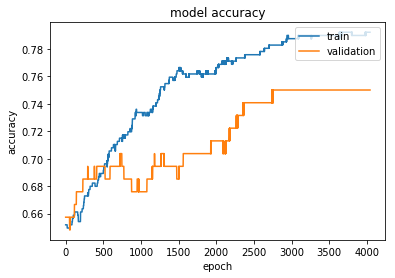

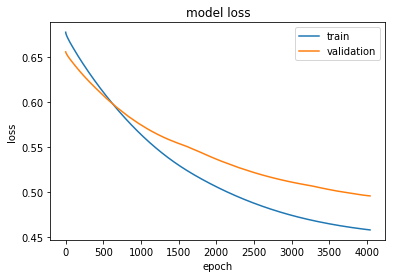

In [16]:
# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

### Perceptron performance on the Test set

In [0]:
# Process the Test set
y_preds = model.predict(df_test[X_columns])
y_preds = [0 if y < 0.5 else 1 for y in y_preds]

In [18]:
print(metrics.classification_report(
    df_test[y_column], y_preds, digits=4
))

              precision    recall  f1-score   support

           0     0.7784    0.8609    0.8176       151
           1     0.6719    0.5375    0.5972        80

    accuracy                         0.7489       231
   macro avg     0.7252    0.6992    0.7074       231
weighted avg     0.7415    0.7489    0.7413       231



### Comparison with Logistic Regression

In [19]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(df_train[X_columns], df_train[y_column])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
print(metrics.classification_report(
    df_test[y_column], logit_model.predict(df_test[X_columns]), digits=4
))

              precision    recall  f1-score   support

           0     0.7600    0.8808    0.8160       151
           1     0.6786    0.4750    0.5588        80

    accuracy                         0.7403       231
   macro avg     0.7193    0.6779    0.6874       231
weighted avg     0.7318    0.7403    0.7269       231

